In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_excel('dataset/cleaned_dataset.xlsx')

In [3]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,lokasi,harga,kecamatan,kota,provinsi
0,60,60,3,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",550000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
1,87,85,3,2,2,"Sawah Besar, Jakarta Pusat, Jakarta D.K.I.",795000007,Sawah Besar,Jakarta Pusat,Jakarta D.K.I.
2,79,60,2,2,2,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",589300023,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
3,144,41,2,1,1,"Cempaka Putih, Jakarta Pusat, Jakarta D.K.I.",495000000,Cempaka Putih,Jakarta Pusat,Jakarta D.K.I.
4,90,60,4,2,1,"Kelapa Gading, Jakarta Utara, Jakarta D.K.I.",2100000000,Kelapa Gading,Jakarta Utara,Jakarta D.K.I.
...,...,...,...,...,...,...,...,...,...,...
2038,90,36,2,1,1,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",475000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
2039,90,69,3,2,2,"Tanah Abang, Jakarta Pusat, Jakarta D.K.I.",900000000,Tanah Abang,Jakarta Pusat,Jakarta D.K.I.
2040,60,55,2,2,2,"Palmerah, Jakarta Barat, Jakarta D.K.I.",500000001,Palmerah,Jakarta Barat,Jakarta D.K.I.
2041,30,25,2,1,2,"Menteng, Jakarta Pusat, Jakarta D.K.I.",300000000,Menteng,Jakarta Pusat,Jakarta D.K.I.


In [4]:
df = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'lantai', 'harga']]

In [5]:
df

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
0,60,60,3,2,2,550000000
1,87,85,3,2,2,795000007
2,79,60,2,2,2,589300023
3,144,41,2,1,1,495000000
4,90,60,4,2,1,2100000000
...,...,...,...,...,...,...
2038,90,36,2,1,1,475000000
2039,90,69,3,2,2,900000000
2040,60,55,2,2,2,500000001
2041,30,25,2,1,2,300000000


In [6]:
df.corr(method='pearson')

,luas_tanah,luas_bangunan,kamar_tidur,kamar_mandi,lantai,harga
luas_tanah,1.000000,0.829601,0.482217,0.441796,-0.011309,0.623134
luas_bangunan,0.829601,1.000000,0.522877,0.547736,-0.001124,0.594811
kamar_tidur,0.482217,0.522877,1.000000,0.784955,0.000853,0.625823
kamar_mandi,0.441796,0.547736,0.784955,1.000000,0.000997,0.621919
lantai,-0.011309,-0.001124,0.000853,0.000997,1.000000,-0.010923
harga,0.623134,0.594811,0.625823,0.621919,-0.010923,1.000000


In [7]:
df = df[['luas_tanah', 'luas_bangunan', 'kamar_tidur', 'kamar_mandi', 'harga']]

In [8]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [9]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(df) 
        
        tmp_bic.append(gmm.bic(df))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

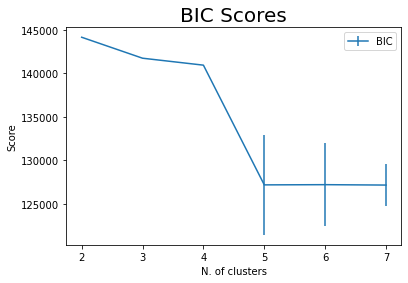

In [10]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [11]:
n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(df) 
        labels=gmm.predict(df)
        sil=metrics.silhouette_score(df, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

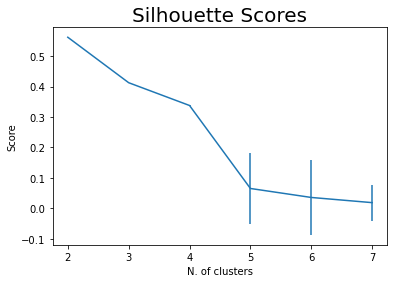

In [12]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")